In [150]:
# Add parent directory to python path (needed for modules imports from src)
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..'))

# Reload modules when code is changed (uncomment for development)
%load_ext autoreload
%autoreload 2

# Import modules
from src.matches import get_all_match_ids, load_all_events
from src.dribbles import get_all_dribbles
from src.player_info import get_player_info
from src.pitch_plot import create_pitch_plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Get all match events

In [6]:
match_ids = get_all_match_ids(competition_id=55, season_id=282)
df_all_events = load_all_events(match_ids)

In [7]:
df_all_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187858 entries, 0 to 187857
Data columns (total 87 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              187858 non-null  object 
 1   index                           187858 non-null  int64  
 2   period                          187858 non-null  int64  
 3   timestamp                       187858 non-null  object 
 4   minute                          187858 non-null  int64  
 5   second                          187858 non-null  int64  
 6   possession                      187858 non-null  int64  
 7   duration                        136240 non-null  float64
 8   match_id                        187858 non-null  int64  
 9   type_id                         187858 non-null  int64  
 10  type_name                       187858 non-null  object 
 11  possession_team_id              187858 non-null  int64  
 12  possession_team_

# Get all dribbles

In [19]:
df_dribbles = get_all_dribbles(match_ids, df_all_events)

df_dribbles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1280 entries, 89 to 187651
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   match_id         1280 non-null   int64  
 1   type_name        1280 non-null   object 
 2   player_id        1280 non-null   float64
 3   outcome_name     1280 non-null   object 
 4   x                1280 non-null   float64
 5   y                1280 non-null   float64
 6   danger_dribble   1280 non-null   bool   
 7   xg_from_dribble  1280 non-null   float64
 8   dribble_to_goal  1280 non-null   bool   
dtypes: bool(2), float64(4), int64(1), object(2)
memory usage: 82.5+ KB


In [143]:
df_dribbles.sort_values(by='xg_from_dribble', ascending=False).head(10)

,match_id,type_name,player_id,outcome_name,x,y,danger_dribble,xg_from_dribble,dribble_to_goal
137351,3938638,Dribble,56905.0,Complete,110.1,54.7,True,0.883042,True
169832,3930166,Dribble,23256.0,Complete,102.8,3.8,True,0.590011,True
48052,3941021,Dribble,20750.0,Complete,120.0,30.7,True,0.398291,True
123503,3938639,Dribble,41202.0,Complete,105.9,44.6,True,0.377385,False
48341,3941021,Dribble,15582.0,Complete,100.8,30.0,True,0.351446,True
123436,3938639,Dribble,151813.0,Complete,64.5,35.7,True,0.350996,False
162428,3930170,Dribble,137487.0,Complete,38.8,72.8,True,0.338277,True
115680,3938640,Dribble,39483.0,Complete,63.1,1.4,True,0.319456,False
165282,3930169,Dribble,45190.0,Complete,95.2,35.9,True,0.293888,False
17537,3942349,Dribble,39624.0,Complete,112.7,64.6,True,0.269540,False


# Get player info

In [22]:
df_player_info = get_player_info(match_ids)
df_player_info.head()

,player_id,player_name,player_short_name,team_name,positions
0,2954,Youri Tielemans,Youri Tielemans,Belgium,"{9, 11}"
1,2972,Marcus Thuram,Marcus Thuram,France,"{16, 21, 23}"
2,2988,Memphis Depay,Memphis Depay,Netherlands,"{19, 21, 23}"
3,3009,Kylian Mbappé Lottin,Kylian Mbappé,France,"{21, 23, 24}"
4,3026,Adrien Rabiot,Adrien Rabiot,France,"{16, 11, 15}"


# Create pitch plot

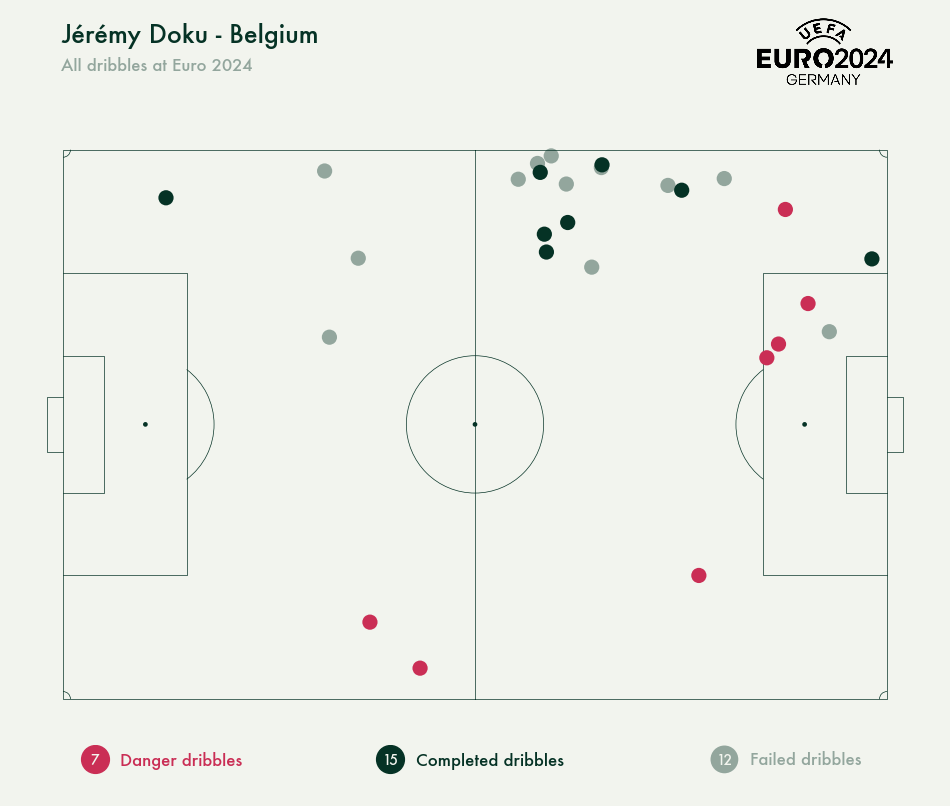

In [ ]:
create_pitch_plot(df_dribbles, 23650, "Jérémy Doku", "Belgium")